In [1]:
import nltk
import pandas as pd
# import re
import string
import contractions
import os
from nltk import word_tokenize, sent_tokenize
# from nltk.corpus import stopwords
from nltk.stem import  WordNetLemmatizer
import inflect
# os.chdir('/home/rinkita/courses/NLPSeminar/nlp-quora-kaggle')
# nltk.download('punkt')
# nltk.download('stopwords')
from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("./data/train.csv")
x_train=data.question_text


In [3]:
x_train.head()

0    How did Quebec nationalists see their province...
1    Do you have an adopted dog, how would you enco...
2    Why does velocity affect time? Does velocity a...
3    How did Otto von Guericke used the Magdeburg h...
4    Can I convert montra helicon D to a mountain b...
Name: question_text, dtype: object

In [4]:
data.target.value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


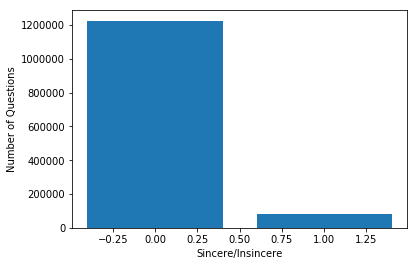

In [6]:
target_count=data.groupby('target').count()
plt.bar(target_count.index.values, target_count['question_text'])
plt.xlabel('Sincere/Insincere')
plt.ylabel('Number of Questions')
plt.show()

In [7]:
# """Replace contractions in string of text"""
contracted_input = x_train.progress_apply(lambda row:contractions.fix(row))

100%|██████████| 1306122/1306122 [03:44<00:00, 5807.00it/s]


In [8]:
def clean_text(question_text):
    question_text = question_text.translate(str.maketrans('','',string.punctuation))
    question_text = question_text.translate(str.maketrans('','','1234567890'))
    question_text = " ".join(question_text.split())    
    question_text = question_text.split()
    # stop_words = set(stopwords.words('english'))
    # question_text = [w for w in question_text if not w in stop_words and len(w) >= 3]
    question_text = [w for w in question_text if len(w) >= 3]
    question_text = [w.strip('/"“”') for w in question_text ]
    question_text = " ".join(question_text)
    return question_text


In [9]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [10]:
cleaned_text = contracted_input.progress_apply(lambda row:clean_text(row))

100%|██████████| 1306122/1306122 [00:21<00:00, 61087.75it/s]


In [11]:

word_tokenised = cleaned_text.progress_apply(lambda text:nltk.word_tokenize(text))


100%|██████████| 1306122/1306122 [04:03<00:00, 5355.80it/s]


In [ ]:
lemmatized_words = word_tokenised.progress_apply(lambda word_list:lemmatize_verbs(word_list))

 46%|████▌     | 595330/1306122 [00:36<00:40, 17351.75it/s]

In [77]:
lemmatized_words.head()

0    [how, do, quebec, nationalists, see, their, pr...
1    [you, have, adopt, dog, how, would, you, encou...
2    [why, do, velocity, affect, time, do, velocity...
3    [how, do, otto, von, guericke, use, the, magde...
4    [can, convert, montra, helicon, mountain, bike...
Name: question_text, dtype: object

In [97]:


def extract_features(question_texts):  
    word2index = {}
    word2count = {}
    index2word = {0: "pad"}
    n_words = 1  # Count SOS and EOS
    for text in question_texts:
        for word in text:             
            if word not in word2index:
                word2index[word] = n_words
                word2count[word] = 1
                index2word[n_words] = word
                n_words += 1
            else:
                word2count[word] += 1
    return word2index,word2count,index2word,n_words

    

#make all the input text of the same size as size max_length input senetnce, padding with word "PAD"(zero padding)
def make_input(sentence):
    sent_len = len(sentence.split(' '))
    if sent_len < max_document_len:
        padded_sentence = sentence + (max_document_len - len(sentence.split(' '))) * " PAD"
    else:
        padded_sentence = sentence

    return padded_sentence,sent_len

In [ ]:
word2index,word2count,index2word,n_words = extract_features(lemmatized_words)